<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%94%D0%97_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [3]:
missing_values = df.isnull().sum()
print("Пропущені значення:\n", missing_values)

Пропущені значення:
 ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [4]:
df_cleaned = df.drop(columns=['ID'])

scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df_cleaned)

scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

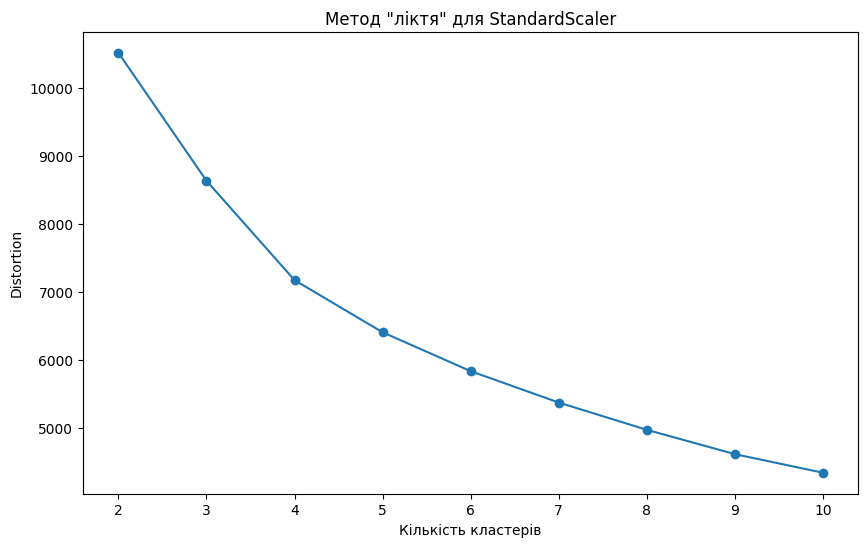

In [5]:
def calculate_metrics(data, max_clusters):
    distortions = []
    silhouette_scores = []
    calinski_harabasz_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        distortions.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(data, labels))

    return distortions, silhouette_scores, calinski_harabasz_scores

max_clusters = 10

distortions_standard, silhouette_scores_standard, calinski_harabasz_scores_standard = calculate_metrics(df_standard_scaled, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), distortions_standard, marker='o')
plt.title('Метод "ліктя" для StandardScaler')
plt.xlabel('Кількість кластерів')
plt.ylabel('Distortion')
plt.show()

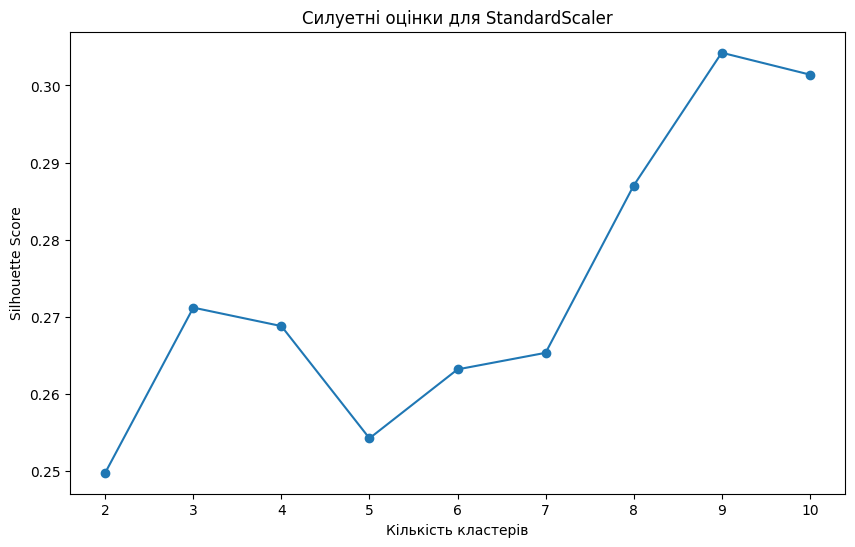

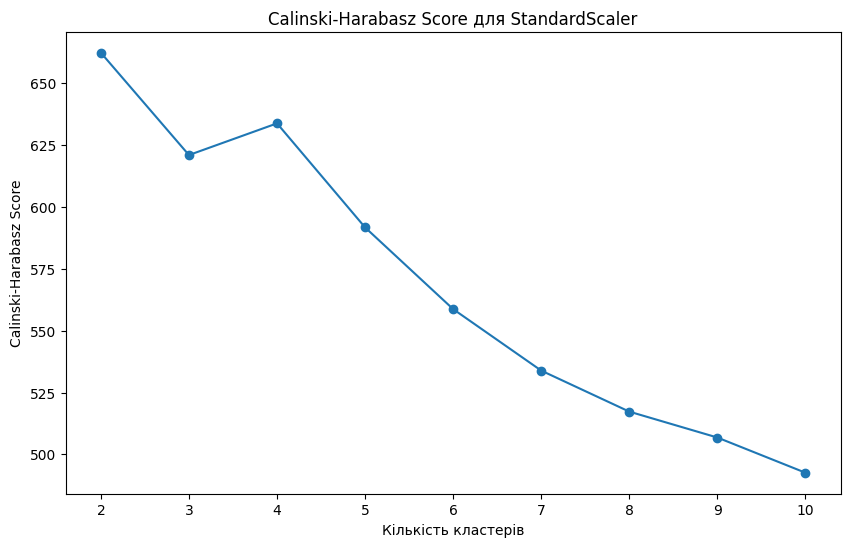

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores_standard, marker='o')
plt.title('Силуетні оцінки для StandardScaler')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores_standard, marker='o')
plt.title('Calinski-Harabasz Score для StandardScaler')
plt.xlabel('Кількість кластерів')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              Sex  Marital status        Age  Education         Income  \
Cluster                                                                  
0        0.853901        0.997163  28.963121   1.068085  105759.119149   
1        0.029825        0.173684  35.635088   0.733333  141218.249123   
2        0.352814        0.019481  35.577922   0.746753   97859.852814   
3        0.501901        0.692015  55.703422   2.129278  158338.422053   

         Occupation  Settlement size  
Cluster                               
0          0.634043         0.422695  
1          1.271930         1.522807  
2          0.329004         0.043290  
3          1.129278         1.110266  


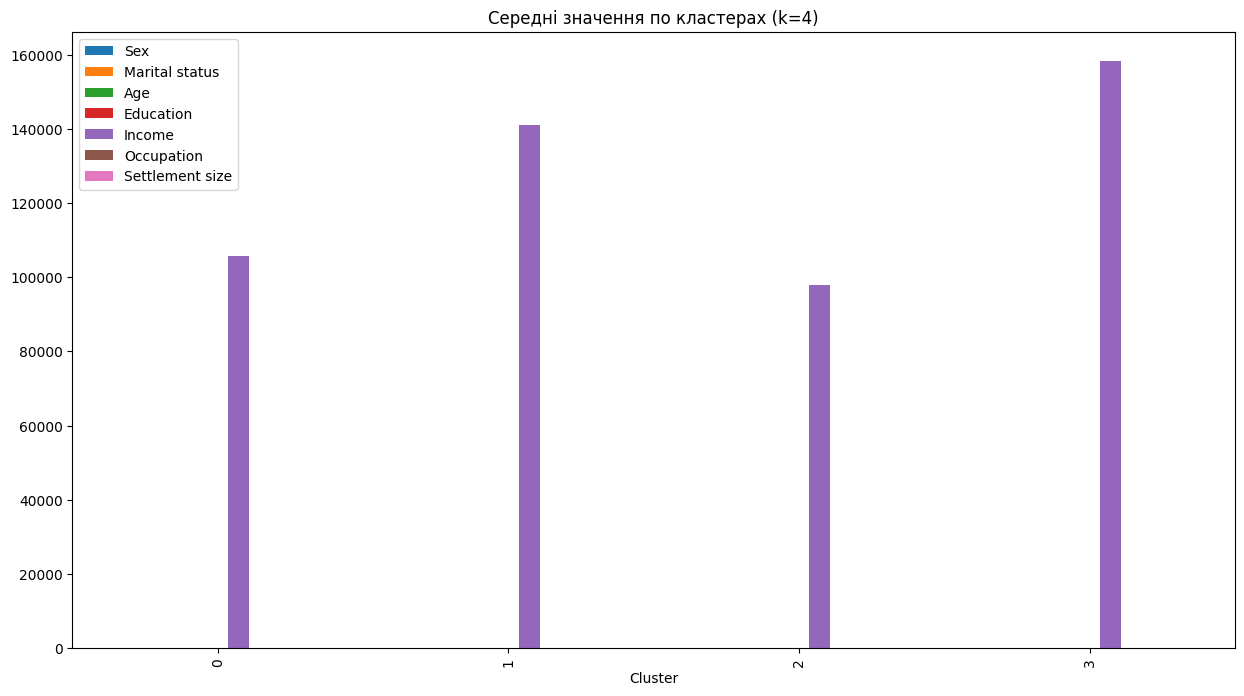

In [7]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_standard_scaled)

cluster_means = df_cleaned.groupby('Cluster').mean()

print(cluster_means)

cluster_means.plot(kind='bar', figsize=(15, 8))
plt.title(f'Середні значення по кластерах (k={optimal_clusters})')
plt.show()

In [8]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_outliers_removed = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_outliers_removed

df_outliers_removed = remove_outliers(df_cleaned.drop(columns=['Cluster']))

df_outliers_removed_scaled = scaler_standard.fit_transform(df_outliers_removed)

kmeans_outliers_removed = KMeans(n_clusters=optimal_clusters, random_state=42)
df_outliers_removed['Cluster'] = kmeans_outliers_removed.fit_predict(df_outliers_removed_scaled)

cluster_means_outliers_removed = df_outliers_removed.groupby('Cluster').mean()

print(cluster_means_outliers_removed)

              Sex  Marital status        Age  Education         Income  \
Cluster                                                                  
0        0.311538        0.011538  40.092308        1.0  102007.592308   
1        0.750951        0.967681  27.655894        1.0  118905.231939   
2        0.837302        0.892857  28.067460        1.0   84075.126984   
3        0.006309        0.059937  40.895899        1.0  140100.908517   

         Occupation  Settlement size  
Cluster                               
0          0.365385         0.076923  
1          1.055133         0.806084  
2          0.000000         0.003968  
3          1.268139         1.476341  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
